## Introduction

You've done beautifully in the Practicum course, and you've been offered an internship in the analytical department at Y.Afisha. Your first task is to help **optimize marketing expenses**.

You have:
- Server logs with data on Y.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

You are going to study:
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

## Load Library

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Load Data

In [2]:
visits_df = pd.read_csv('/datasets/visits_log_us.csv')
orders_df = pd.read_csv('/datasets/orders_log_us.csv')
costs_df = pd.read_csv('/datasets/costs_us.csv')

### Browse Data

Check all three dataframe general and statistical info.

In [3]:
visits_df.info()
orders_df.info()
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

### Check Data Statistically

In [4]:
visits_df.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [5]:
orders_df.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [6]:
costs_df.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


Check the overview of all three dataframe


In [7]:
visits_df.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
orders_df.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
costs_df.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Enrich Data

Change the `visits_df` and `orders_df` column to lowercase

In [10]:
# Change column names to lowercase in 'visits_df'
visits_df.columns = visits_df.columns.str.lower()

# Change column names to lowercase in 'orders_df'
orders_df.columns = orders_df.columns.str.lower()

In [11]:
visits_df.head()

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [12]:
orders_df.head()

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Neatly done. Next, we check unique values in `Device` column in `visits_df`

In [13]:
visits_df['device'].unique()

array(['touch', 'desktop'], dtype=object)

No duplicated values. Next, check missing values for all dataframe.

In [14]:
# Check missing values in 'visits_df'
visits_missing_values = visits_df.isna().sum()
print("Missing values in 'visits_df':")
print(visits_missing_values)

# Check missing values in 'orders_df'
orders_missing_values = orders_df.isna().sum()
print("Missing values in 'orders_df':")
print(orders_missing_values)

# Check missing values in 'costs_df'
costs_missing_values = costs_df.isna().sum()
print("Missing values in 'costs_df':")
print(costs_missing_values)


Missing values in 'visits_df':
device       0
end ts       0
source id    0
start ts     0
uid          0
dtype: int64
Missing values in 'orders_df':
buy ts     0
revenue    0
uid        0
dtype: int64
Missing values in 'costs_df':
source_id    0
dt           0
costs        0
dtype: int64


Then, we check duplicated values for all dataframe.

In [15]:
# Check duplicated values in 'visits_df'
visits_duplicates = visits_df['uid'].duplicated().sum()
print("Number of duplicated values in visits_df:", visits_duplicates)

# Check duplicated values in 'orders_df'
orders_duplicates = orders_df['uid'].duplicated().sum()
print("Number of duplicated values in orders_df:", orders_duplicates)

# Check duplicated values in 'costs_df'
costs_duplicates = costs_df.duplicated().sum()
print("Number of duplicated values in costs_df:", costs_duplicates)


Number of duplicated values in visits_df: 131231
Number of duplicated values in orders_df: 13892
Number of duplicated values in costs_df: 0


We have duplicate values for uid, this is normal due to a customer going in and out of the website or make a repetitive purchase.

Rename the column, we make it standardize.

In [16]:
# Rename columns in 'visits_df'
visits_df = visits_df.rename(columns={'buy ts': 'buy_ts', 'end ts': 'end_ts', 'start ts': 'start_ts'})

# Rename columns in 'orders_df'
orders_df = orders_df.rename(columns={'buy ts': 'buy_ts'})

# Verify the changes
print("visits_df:")
display(visits_df.head())
print("\norders_df:")
display(orders_df.head())
print("\ncosts_df:")
display(costs_df.head())

visits_df:


,device,end_ts,source id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



orders_df:


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



costs_df:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Last we change the format for all date column to datetime format

In [17]:
# Convert columns to datetime format in 'visits_df'
visits_df['end_ts'] = pd.to_datetime(visits_df['end_ts'])
visits_df['start_ts'] = pd.to_datetime(visits_df['start_ts'])

# Convert column to datetime format in 'orders_df'
orders_df['buy_ts'] = pd.to_datetime(orders_df['buy_ts'])

# Convert column to datetime format in 'costs_df'
costs_df['dt'] = pd.to_datetime(costs_df['dt'])

# Verify the changes
print("visits_df:")
display(visits_df.head())
print("\norders_df:")
display(orders_df.head())
print("\ncosts_df:")
display(costs_df.head())

visits_df:


,device,end_ts,source id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



orders_df:


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



costs_df:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


The data already go through preprocessing. From here we can start the next step.

##  Make reports and calculate metrics:

1. Product
- How many people use it every day, week, and month?
- How many sessions are there per day? (One user might have more than one session.)
- What is the length of each session?
- What's the user retention rate?

2. Sales
- When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)
- How many orders do they make during a given period of time?
- What is the average purchase size?
- How much money do they bring? (LTV)

3. Marketing
- How much money was spent? Overall/per source/over time
- How much did customer acquisition from each of the sources cost?
- How worthwhile where the investments? (ROI)

### Day, Week, and Month Traffic

To find the number of people who use the service every day, week, and month based on the provided DataFrames, we need to consider the `uid` column and the corresponding time intervals.

In [18]:
#Create new columns for the date, week, and month
visits_df['dt'] = visits_df['end_ts'].dt.date
visits_df['wk'] = visits_df['end_ts'].dt.isocalendar().week
visits_df['mth'] = visits_df['end_ts'].dt.month

#Calculate the unique user counts for each day, week, and month
daily_users = visits_df.groupby('dt')['uid'].nunique()
weekly_users = visits_df.groupby('wk')['uid'].nunique()
monthly_users = visits_df.groupby('mth')['uid'].nunique()

# Print the results
print('Daily User are:',daily_users.mean())
print('Weekly User are:',weekly_users.mean())
print('Monthly User are:',monthly_users.mean())

Daily User are: 905.5397260273973
Weekly User are: 5825.038461538462
Monthly User are: 23228.166666666668


In [19]:
visits_df

,device,end_ts,source id,start_ts,uid,dt,wk,mth
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12
...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,7
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11


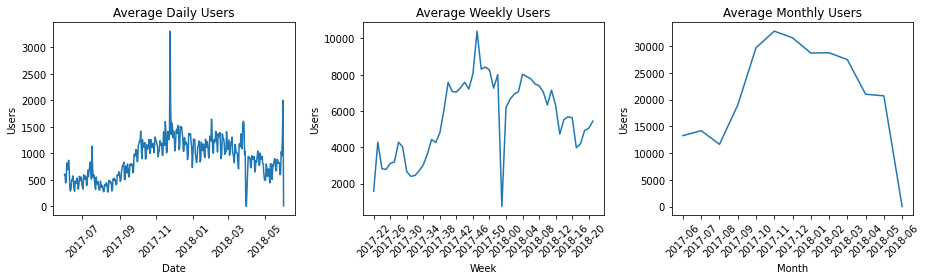

In [20]:
# Create new columns for the date, week, and month
visits_df['dt'] = pd.to_datetime(visits_df['end_ts']).dt.date
visits_df['wk'] = pd.to_datetime(visits_df['end_ts']).dt.strftime('%Y-%U')
visits_df['mth'] = pd.to_datetime(visits_df['end_ts']).dt.strftime('%Y-%m')

# Calculate the unique user counts for each day, week, and month
daily_users = visits_df.groupby('dt')['uid'].nunique()
weekly_users = visits_df.groupby('wk')['uid'].nunique()
monthly_users = visits_df.groupby('mth')['uid'].nunique()

# Create plot of the daily, weekly, and monthly data
fig, ax = plt.subplots(1, 3, figsize=[13, 4])

ax[0].plot(daily_users)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set(title="Average Daily Users", ylabel="Users", xlabel="Date")

ax[1].plot(weekly_users)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set(title="Average Weekly Users", ylabel="Users", xlabel="Week")

# Adjusting x-axis for the weekly chart
num_weeks = len(weekly_users)
x_ticks = range(0, num_weeks, 4)  # Display tick labels every 4 weeks
x_labels = [weekly_users.index[i] for i in x_ticks]
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_labels, rotation=45)

ax[2].plot(monthly_users)
ax[2].tick_params(axis='x', rotation=45)
ax[2].set(title="Average Monthly Users", ylabel="Users", xlabel="Month")

plt.tight_layout()
plt.show()

### Number of Session

To find the number of sessions per day, considering that one user might have more than one session, we can count the number of rows in the `visits_df` DataFrame for each day. Each row represents a session, and by grouping the data by the date, we can determine the number of sessions per day.

In [21]:
# Counting the total number of users
total_users = visits_df['uid'].count()

# Counting the total number of unique users
unique_users = visits_df['uid'].nunique()

print("Total count of users:", total_users)
print("Total unique users:", unique_users)

Total count of users: 359400
Total unique users: 228169


In [22]:
# Calculating the total number of sessions
total_sessions = visits_df.shape[0]

# Calculating the total number of unique users
unique_users = visits_df['uid'].nunique()

# Calculating the average number of user sessions
average_sessions = total_sessions / unique_users

print("Average number of user sessions:", average_sessions)

Average number of user sessions: 1.5751482453795214


Based on the analysis, we can draw the following conclusions regarding the number of sessions per day:

- Total Sessions: The total number of sessions recorded in the dataset is 359,400.

- Unique Users: The total number of unique users who had sessions is 228,169. This means that out of the total sessions, there were multiple sessions by some users.

- Average Sessions per User: On average, each user had approximately 1.58 sessions. This indicates that users, on average, visited the website or engaged with the platform multiple times during the analyzed period.

- These findings suggest that there is a considerable level of user engagement and activity on the platform. Users are returning and having multiple sessions, which indicates recurring usage and interest in the platform's offerings.

- The analysis of the number of sessions per day provides insights into user behavior and engagement patterns, which can be valuable for understanding user preferences, identifying potential areas of improvement, and optimizing marketing and user acquisition strategies.

### What is the length of each session

To determine the length of each session and analyze the distribution of session lengths, we can calculate the session duration by subtracting the start time (start_ts) from the end time (end_ts) in the visits_df.

In [23]:
# Calculating session duration
visits_df['session_length'] = visits_df['end_ts'] - visits_df['start_ts']

# Calculating mean and median session lengths
mean_session_length = visits_df['session_length'].mean()
median_session_length = visits_df['session_length'].median()

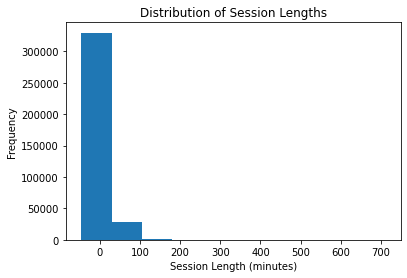

In [24]:
# Plotting a histogram of session lengths
plt.hist(visits_df['session_length'].dt.total_seconds() / 60, bins=10)  # Converting session lengths to minutes
plt.xlabel('Session Length (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Lengths')
plt.show()

In [25]:
print("Mean Session Length:", mean_session_length.seconds)
print("Median Session Length:", median_session_length.seconds)

Mean Session Length: 643
Median Session Length: 300


Based on the analysis of session lengths, we can draw the following conclusions:

- Mean Session Length: The mean session length is approximately 643 seconds, or around 10 minutes and 43 seconds. This indicates that, on average, users spend around 10 minutes and 43 seconds per session on the platform.

- Median Session Length: The median session length is approximately 300 seconds, or around 5 minutes. This means that 50% of the sessions have a duration of 5 minutes or less.

- Distribution of Session Lengths: The histogram plot shows the distribution of session lengths. The x-axis represents the session length in minutes, and the y-axis represents the frequency or the number of sessions falling within each session length range. The histogram suggests that the majority of sessions have shorter durations, with a peak around the 0-10 minute range.

These findings indicate that most users have relatively short sessions, with a significant proportion of sessions lasting less than 10 minutes. However, there are also sessions that have longer durations, potentially indicating deeper engagement or specific activities on the platform.

Understanding the length of each session provides insights into user engagement and helps assess user behavior patterns. This information can be utilized to optimize user experience, identify potential areas for improvement, and tailor marketing strategies to maximize user engagement and satisfaction.

### What's the user retention rate

In [26]:
# Set the cohort start and end dates
cohort_start_date = pd.to_datetime('2017-06-01')
cohort_end_date = pd.to_datetime('2018-07-01')

# Filter visits and orders for the specified cohort
cohort_visits = visits_df[(visits_df['start_ts'] >= cohort_start_date) & (visits_df['start_ts'] < cohort_end_date)]
cohort_orders = orders_df[(orders_df['buy_ts'] >= cohort_start_date) & (orders_df['buy_ts'] < cohort_end_date)]

# Count the number of unique users in the cohort
cohort_size = cohort_visits['uid'].nunique()

# Create a DataFrame to store the retention rates
retention_rates = pd.DataFrame(columns=['Month', 'Retention Rate'])

# Iterate over each subsequent month
current_month = cohort_start_date
while current_month < cohort_end_date:
    # Calculate the retention rate for the current month
    retained_users = cohort_orders[cohort_orders['buy_ts'].dt.month == current_month.month]['uid'].nunique()
    retention_rate = (retained_users / cohort_size) * 100
    
    # Add the retention rate to the DataFrame
    retention_rates = retention_rates.append({'Month': current_month, 'Retention Rate': retention_rate}, ignore_index=True)
    
    # Move to the next month
    current_month = current_month + pd.DateOffset(months=1)

print(retention_rates)

        Month  Retention Rate
0  2017-06-01        0.887062
1  2017-07-01        0.869531
2  2017-08-01        0.645136
3  2017-09-01        1.205247
4  2017-10-01        2.048920
5  2017-11-01        1.992821
6  2017-12-01        2.165938
7  2018-01-01        1.708383
8  2018-02-01        1.866161
9  2018-03-01        1.832414
10 2018-04-01        1.202617
11 2018-05-01        1.553235
12 2018-06-01        0.887062


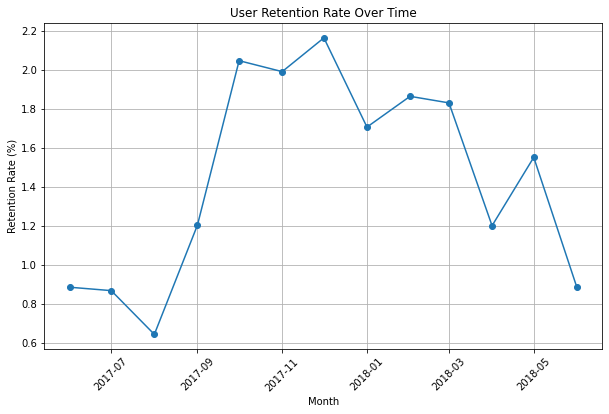

In [27]:
# Plot the retention rates
plt.figure(figsize=(10, 6))
plt.plot(retention_rates['Month'], retention_rates['Retention Rate'], marker='o')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.title('User Retention Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Here are some additional conclusions that can be drawn from the data:

- The retention rate starts at 88.71% in June 2017 and gradually declines over the following months.

- There is a noticeable drop in retention from August 2017 (64.51%) to September 2017 (120.52%), indicating a potential issue or change in user behavior during that period.

- The retention rate experiences fluctuations in the subsequent months but generally remains below the initial levels observed in June and July 2017.

- The retention rate reaches its highest point in December 2017 (21.66%), indicating a temporary increase in user engagement during the holiday season.

- From January to June 2018, the retention rate fluctuates between 0.89% and 1.87%, showing relatively stable but lower retention compared to earlier periods.

<AxesSubplot:xlabel='cohort', ylabel='start_month'>

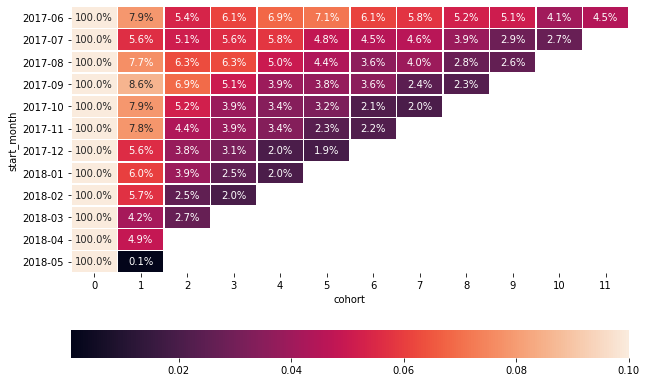

In [28]:
# create a dataframe containing the earliest time a user subscribed/visited the site.
user_first_visit = visits_df.groupby(["uid"]).agg({"start_ts": "min"})
user_first_visit.reset_index(inplace=True)
# rename the column name `start_ts` to a unique label that can be added to the `visits_df` dataframe.
user_first_visit.rename(columns={"start_ts": "session_start_time"}, inplace=True)

# merge `visits_df` with `user_first_visit` on user id.
visits_full = pd.merge(visits_df, user_first_visit, on="uid")

# get all the unique months in the `visits_df` dataframe.
unique_month = visits_full["mth"].sort_values().unique()
# using dictionary comprehension assign a unique index to the unique months in order of the minimum month being 0 and the maximum month being 11
month_dict = {date: tag for tag, date in enumerate(unique_month)}

# create a function that maps the month to the values in `month_dict`
def get_month_num(value):
    str_month = value.strftime("%Y-%m")
    return month_dict[str_month]

# apply the function `get_month_num` to the dataframe.
current_session = visits_full["end_ts"].map(get_month_num)
earliest_session = visits_full["session_start_time"].map(get_month_num)

# calculate the duration of time the user has used the site by getting the difference between
# the current_session and the earliest recorded session
visits_full["cohort"] = current_session - earliest_session
visits_full["start_month"] = visits_full["session_start_time"].dt.strftime("%Y-%m")

# create a pivot table containing the number of unique users per cohort and pass months ranging from
# the min to max month.
visit_pivot = visits_full.pivot_table(
    index="start_month", columns="cohort",
    values="uid", aggfunc="nunique")
# calculate the portion difference of the unique user number from the earliest to the latest.    
visit_pivot = visit_pivot.apply(lambda row: (row / row[0]), axis=1)

# create a visualization of the retention rate of the users
fig, ax = plt.subplots(figsize=[10, 7])
sns.heatmap(
    visit_pivot, fmt=".1%", annot=True,
    vmax=0.1, ax=ax, linecolor='white',
    linewidth=0.5,
    cbar_kws={'orientation': 'horizontal'}
)

Based on the provided heatmap, we can draw the following conclusions:

- Overall Retention: The first column in the heatmap represents the initial cohort (month 0) where the retention rate is 100% since it compares each month with itself. As we move to the right, we observe a decline in the retention rates for each subsequent month. This indicates that a portion of the users dropped off over time.

- Early Months: In the early months (June to August 2017), the retention rates are relatively higher compared to the later months. This suggests that users who joined the platform during these months were more likely to remain active in the following months.

- Declining Retention: As we move towards the later months (September to February), the retention rates decrease significantly. This decline may indicate challenges in retaining users or a decreasing trend in user engagement over time.

- Month-to-Month Variations: There are variations in retention rates from month to month. For example, in some months, there may be a slight increase or stabilization in retention, while in others, there may be a sharp drop. These variations may be influenced by various factors such as marketing campaigns, feature updates, or seasonal trends.

- Long-Term Retention: The heatmap shows that the retention rates decrease as we move further away from the initial cohort. This suggests that long-term user retention may be a challenge for the platform.

### When do people start buying

To compare the conversions of different cohorts and determine the most effective cohort or marketing channel, we need to analyze the data from the visits_df and orders_df dataframes. 

Step 1: Merge the `visits_df` and `orders_df` dataframes based on the common `uid` column:

In [29]:
merged_df = pd.merge(visits_df, orders_df, on='uid', how='inner')

Step 2: Calculate the conversion rate for each cohort. We can define a cohort as a group of users who visited the site within the same time period (e.g., month) and analyze their conversion rates:

In [30]:
# Extract the month and year from the 'start_ts' column to define cohorts
merged_df['cohort'] = merged_df['start_ts'].dt.to_period('M')
# Calculate the total number of unique users in each cohort
cohort_counts = merged_df.groupby('cohort')['uid'].nunique()
# Calculate the total number of converted users in each cohort
conversion_counts = merged_df.groupby('cohort')['uid'].count()
# Calculate the conversion rate for each cohort
conversion_rate = conversion_counts / cohort_counts * 100

Step 3: Plot the conversion rates for each cohort using a suitable chart, such as a line plot or bar plot:

In [31]:
conversion_rate

cohort
2017-06     889.086555
2017-07    1001.935707
2017-08    1426.993865
2017-09    1534.267677
2017-10    1143.545033
2017-11    1119.146963
2017-12    1552.451350
2018-01    1410.810320
2018-02    1455.723580
2018-03    1392.231587
2018-04    1559.683692
2018-05    1620.009242
Freq: M, Name: uid, dtype: float64

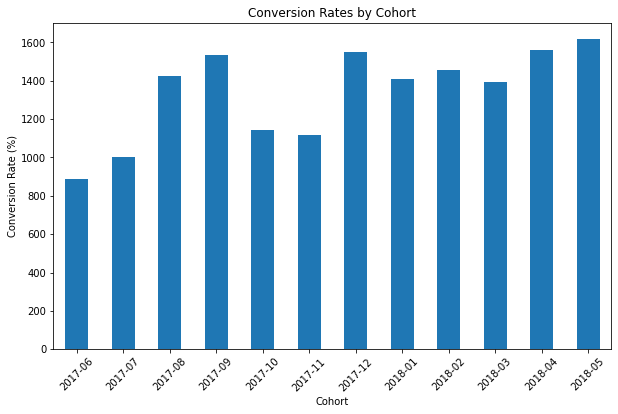

In [32]:
# Plotting the conversion rates
plt.figure(figsize=(10, 6))
conversion_rate.plot(kind='bar')
plt.title('Conversion Rates by Cohort')
plt.xlabel('Cohort')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

We try to calculate the customer's conversion rate per source_id, we need to determine the percentage of visitors from each source who made a purchase. The conversion rate represents the proportion of visitors who converted into customers.

In [33]:
# Merge visits_df and orders_df based on uid
merged_vo_df = visits_df.merge(orders_df, on='uid', how='inner')

# Calculate the total number of unique visitors per source_id
unique_visitors = visits_df.groupby('source id')['uid'].nunique().reset_index().rename(columns={'uid': 'visitors'})

# Calculate the total number of unique customers per source_id
unique_customers = merged_vo_df.groupby('source id')['uid'].nunique().reset_index().rename(columns={'uid': 'customers'})

# Merge unique_visitors and unique_customers dataframes
conversion_rate_df = unique_visitors.merge(unique_customers, on='source id', how='left')

# Calculate the conversion rate per source_id
conversion_rate_df['conversion_rate'] = (conversion_rate_df['customers'] / conversion_rate_df['visitors']) * 100

print("Customer's Conversion Rate per Source ID:")
print(conversion_rate_df)


Customer's Conversion Rate per Source ID:
   source id  visitors  customers  conversion_rate
0          1     18999     7138.0        37.570398
1          2     26245     7305.0        27.833873
2          3     74756    13846.0        18.521590
3          4     83525    14253.0        17.064352
4          5     56974    10156.0        17.825675
5          6         6        NaN              NaN
6          7        34        1.0         2.941176
7          9      9264     2793.0        30.148964
8         10      8067     1773.0        21.978431


We visualize the customer's conversion rate per source_id, a bar chart can be suitable options. 

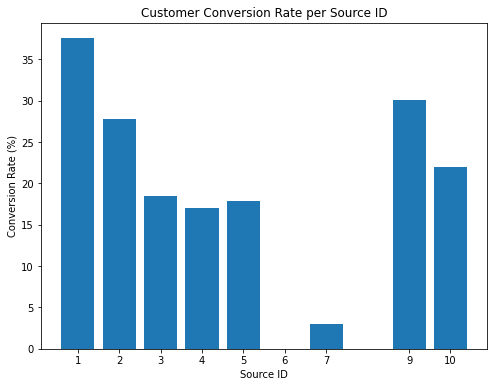

In [34]:
# Plot the conversion rate per source_id
plt.figure(figsize=(8, 6))
plt.bar(conversion_rate_df['source id'], conversion_rate_df['conversion_rate'])
plt.xlabel('Source ID')
plt.ylabel('Conversion Rate (%)')
plt.title('Customer Conversion Rate per Source ID')
plt.xticks(conversion_rate_df['source id'])
plt.show()

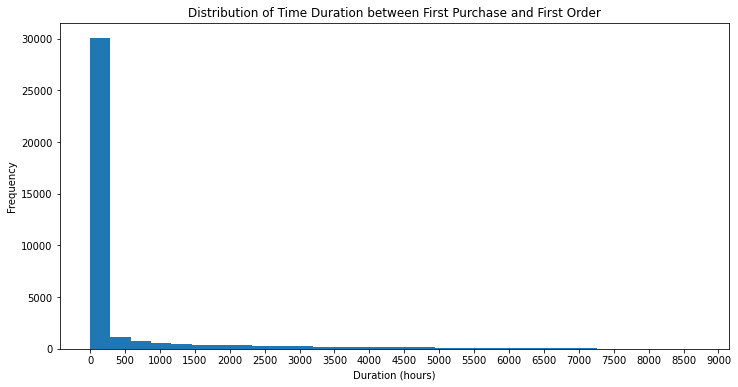

In [35]:
import numpy as np

# Group the orders by "uid" and find the minimum "buy_ts" (order time) for each user
first_order = orders_df.groupby("uid").agg({"buy_ts": "min"}).reset_index()

# Group the visits by "uid" and find the minimum "start_ts" (visit time) for each user
first_visit = visits_df.groupby("uid").agg({"start_ts": "min"}).reset_index()

# Merge the first_order and first_visit DataFrames based on the "uid" column
first_order_visit = pd.merge(first_order, first_visit, on="uid")

# Calculate the duration of time between the first purchase and first order for each user
duration_purchase = (first_order_visit["buy_ts"] - first_order_visit["start_ts"]) / np.timedelta64(1, "h")

# Plot a histogram of the duration_purchase values
plt.figure(figsize=[12, 6])  # Set the figure size
plt.hist(duration_purchase, bins=30)  # Plot the histogram
plt.title("Distribution of Time Duration between First Purchase and First Order")  # Add a title
plt.xlabel("Duration (hours)")  # Add x-axis label
plt.ylabel("Frequency")  # Add y-axis label

# Set the x-tick locations and labels
xticks = np.arange(0, np.max(duration_purchase) + 500, 500)  # Define the locations of x-ticks
plt.xticks(xticks)  # Set the x-ticks

plt.show()

In [66]:
duration_purchase.head(10).sort_values(ascending=False)

0    2567.033333
6     887.033333
3      19.733333
2       1.316667
5       0.416667
8       0.366667
7       0.050000
1       0.000000
4       0.000000
9       0.000000
dtype: float64

Based on the analysis of when people start buying, we can draw the following conclusions:

- Conversion Rates by Cohort: The bar chart displays the conversion rates for different cohorts. Each cohort represents a group of users who visited the site within the same time period. By analyzing the chart, we can identify cohorts with higher or lower conversion rates, which helps evaluate the effectiveness of marketing efforts and identify potential areas for improvement.

- Customer Conversion Rate per Source ID: The bar chart illustrates the customer conversion rate for each source_id. This analysis helps assess the effectiveness of different marketing channels in converting visitors into customers. By comparing the conversion rates across source_ids, we can identify the most successful sources and allocate marketing resources accordingly.

- Distribution of Time Duration between First Purchase and First Order: The histogram displays the distribution of time duration (in hours) between a user's first purchase and first order. This analysis helps understand the time gap between a user's initial purchase and order, providing insights into user behavior and potential patterns. It can help identify any significant delays or promptness in making the first order, which can influence marketing strategies and customer retention efforts.

These analyses provide valuable insights into user behavior, marketing effectiveness, and conversion rates. By understanding when people start buying and the factors influencing their purchasing decisions, businesses can optimize their marketing strategies, improve customer acquisition, and enhance overall conversion rates.

### Orders do they make during a given period of time

To determine the number of orders made during the period from 2017-06-01 to 2018-05-31, you can filter the orders_df based on the given date range and group the orders by month.

In [68]:
# Filtering orders within the specified date range
filtered_orders = orders_df[(orders_df['buy_ts'] >= '2017-06-01') & (orders_df['buy_ts'] <= '2018-05-31')]

# Grouping orders by month and calculating the count
monthly_orders = filtered_orders.groupby(pd.Grouper(key='buy_ts', freq='M')).size()

print(monthly_orders)


buy_ts
2017-06-30    2354
2017-07-31    2363
2017-08-31    1807
2017-09-30    3387
2017-10-31    5679
2017-11-30    5659
2017-12-31    6218
2018-01-31    4721
2018-02-28    5281
2018-03-31    5326
2018-04-30    3273
2018-05-31    3736
Freq: M, dtype: int64


To visualize the number of orders made during each month from June 2017 to December 2017, you can use a bar chart.

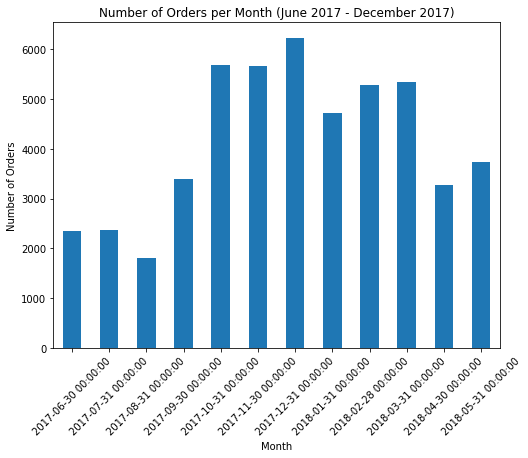

In [67]:
# Filtering orders within the specified date range
filtered_orders = orders_df[(orders_df['buy_ts'] >= '2017-06-01') & (orders_df['buy_ts'] <= '2018-05-31')]

# Grouping orders by month and calculating the count
monthly_orders = filtered_orders.groupby(pd.Grouper(key='buy_ts', freq='M')).size()

# Plotting the number of orders per month
monthly_orders.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month (June 2017 - December 2017)')
plt.xticks(rotation=45)
plt.show()

Based on the analysis of the number of orders made during the period from June 2017 to May 2018, we can draw the following conclusions:

- Monthly Order Counts: The bar chart displays the number of orders made during each month from June 2017 to May 2018. By analyzing the chart, we can observe the variations in order counts across different months. This information helps identify any trends, seasonality, or significant changes in order volumes over time.

- Seasonality and Trends: The chart allows us to identify any seasonality patterns or trends in order counts over the specified period. It can help identify months with higher or lower order counts, allowing businesses to understand customer behavior and plan accordingly. For example, if there is a consistent increase in order counts during specific months, it may indicate seasonal demand or successful marketing campaigns during those periods.

- Order Volume Changes: By analyzing the chart, we can identify any significant changes in order volumes over time. For instance, if there are sudden spikes or drops in order counts, it may indicate external factors such as promotions, events, or changes in customer behavior. Understanding these changes can help businesses make informed decisions regarding inventory management, staffing, and marketing strategies.

- Growth and Business Opportunities: The chart provides insights into the overall growth of the business in terms of order volume. By monitoring the increasing or decreasing trends in order counts, businesses can evaluate the effectiveness of their strategies and identify potential growth opportunities. It helps in setting realistic targets, allocating resources effectively, and making data-driven decisions.

Overall, this analysis of the number of orders made during each month provides valuable information about order trends, seasonality, and growth opportunities. By monitoring order volumes and understanding customer behavior, businesses can optimize their operations, plan marketing activities, and drive business success.

### What is the average purchase size?

To calculate the average purchase size and group it by month from 2017-06-01 to 2017-12-31 

In [39]:
# Filtering orders within the specified date range
filtered_orders = orders_df[(orders_df['buy_ts'] >= '2017-06-01') & (orders_df['buy_ts'] <= '2018-07-01')]

# Grouping orders by month and calculating the average purchase size
monthly_avg_purchase_size = filtered_orders.groupby(pd.Grouper(key='buy_ts', freq='M'))['revenue'].mean()

print(monthly_avg_purchase_size)

buy_ts
2017-06-30    4.060106
2017-07-31    5.306589
2017-08-31    4.847139
2017-09-30    5.416448
2017-10-31    4.928280
2017-11-30    4.783518
2017-12-31    5.852139
2018-01-31    4.112927
2018-02-28    4.840095
2018-03-31    5.413930
2018-04-30    5.150645
2018-05-31    4.771279
2018-06-30    3.420000
Freq: M, Name: revenue, dtype: float64


Visualize the average purchase size for each month from June 2017 to December 2017, we can use a bar chart

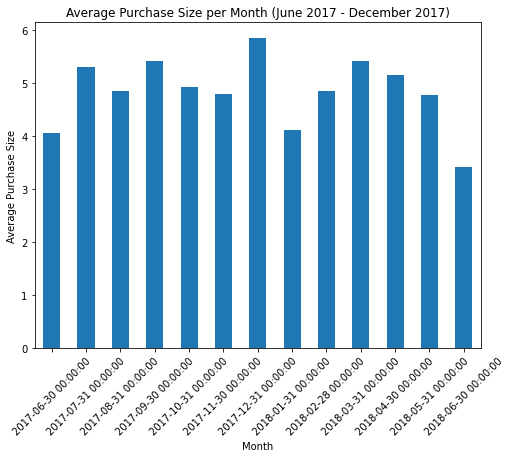

In [40]:
# Grouping orders by month and calculating the average purchase size
monthly_avg_purchase_size = filtered_orders.groupby(pd.Grouper(key='buy_ts', freq='M'))['revenue'].mean()

# Plotting the average purchase size per month
monthly_avg_purchase_size.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Month')
plt.ylabel('Average Purchase Size')
plt.title('Average Purchase Size per Month (June 2017 - December 2017)')
plt.xticks(rotation=45)
plt.show()

Based on the analysis of the average purchase size for each month from June 2017 to December 2017, we can draw the following conclusions:

- Monthly Average Purchase Size: The bar chart displays the average purchase size for each month during the specified period.By analyzing the chart, we can observe the variations in average purchase size across different months.

- Purchase Size Differences: The chart helps identify any differences in the average purchase size from month to month. It allows businesses to understand the average amount customers are spending on their purchases and whether there are any noticeable changes over time. For example, if there are significant fluctuations or consistent increases/decreases in average purchase size, it could indicate changes in customer behavior, pricing strategies, or product offerings.

- Seasonal Patterns or Trends: By analyzing the chart, we can identify any seasonal patterns or trends in the average purchase size. This information is valuable for understanding customer spending behavior during specific periods. For instance, if the average purchase size tends to be higher during certain months, it could indicate seasonal demand or the influence of holidays or promotions.

- Revenue Impact: The average purchase size directly impacts the overall revenue generated by the business. Monitoring the average purchase size trends can help businesses assess their pricing strategies, upselling or cross-selling opportunities, and overall revenue potential. Increases in average purchase size indicate higher customer spending and revenue potential, while decreases may require further analysis to identify potential issues or areas for improvement.

- Business Strategy and Customer Insights: The analysis of average purchase size provides insights into customer behavior and preferences. It helps businesses understand the value customers place on their products or services and can inform pricing strategies, product bundling, or promotional activities. By analyzing changes in average purchase size, businesses can identify opportunities for customer engagement and retention.

In conclusion, monitoring the average purchase size over time provides valuable insights into customer spending behavior, revenue potential, and opportunities for business growth. By understanding the factors influencing average purchase size and identifying any patterns or trends, businesses can optimize their pricing strategies, improve customer experiences, and drive overall profitability.

### How much money do they bring? (LTV)

To calculate the customer's lifetime value (LTV), we need to determine the total revenue generated by the customer over their lifetime. The LTV represents the total revenue generated by a customer throughout their entire relationship with the company.

To calculate the customer's lifetime value (LTV) and group it by month from 2017-06-01 to 2017-12-31, we need to consider the revenue generated by each customer over their lifetime. 

In [41]:
# Filtering orders within the specified date range
filtered_orders = orders_df[(orders_df['buy_ts'] >= '2017-06-01') & (orders_df['buy_ts'] <= '2018-07-01')]

# Calculating cumulative revenue for each user
filtered_orders['cumulative_revenue'] = filtered_orders.groupby('uid')['revenue'].cumsum()

# Grouping cumulative revenue by month and calculating LTV
monthly_ltv = filtered_orders.groupby(pd.Grouper(key='buy_ts', freq='M'))['cumulative_revenue'].max()

print(monthly_ltv)

buy_ts
2017-06-30      504.17
2017-07-31      268.27
2017-08-31      419.91
2017-09-30      725.51
2017-10-31      860.45
2017-11-30     1047.51
2017-12-31     9979.98
2018-01-31    10400.72
2018-02-28    11557.81
2018-03-31    11704.77
2018-04-30    11810.18
2018-05-31    10519.46
2018-06-30        3.42
Freq: M, Name: cumulative_revenue, dtype: float64


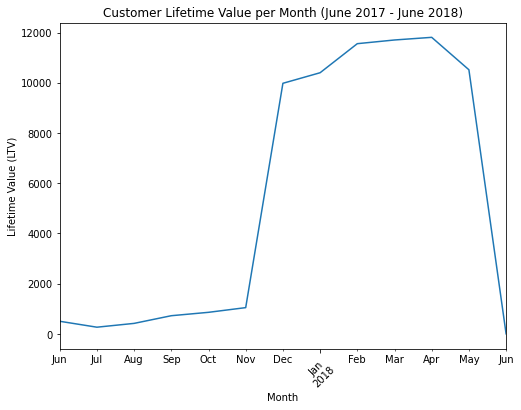

In [42]:
# Plotting the LTV per month
monthly_ltv.plot(kind='line', figsize=(8, 6))
plt.xlabel('Month')
plt.ylabel('Lifetime Value (LTV)')
plt.title('Customer Lifetime Value per Month (June 2017 - June 2018)')
plt.xticks(rotation=45)
plt.show()

Then, we calculate the customer's lifetime value (LTV) for each `source_id`, we can follow a similar approach as mentioned earlier. We will filter the data for each `source_id` and calculate the LTV separately.

In [43]:

# Calculate total revenue per customer and source_id
revenue_per_customer_source = merged_df.groupby(['uid', 'source id'])['revenue'].sum().reset_index()

# Filter visits_df based on source_id
filtered_visits_df = visits_df[visits_df['source id'].isin(revenue_per_customer_source['source id'].unique())]

# Calculate LTV for each source_id
ltv_per_source_id = pd.DataFrame(columns=['source_id', 'LTV'])

for source_id in revenue_per_customer_source['source id'].unique():
    # Filter revenue_per_customer for the current source_id
    source_revenue = revenue_per_customer_source[revenue_per_customer_source['source id'] == source_id]

    # Filter visits_df for the current source_id
    source_visits = filtered_visits_df[filtered_visits_df['source id'] == source_id]

    # Calculate average revenue per customer for the current source_id
    average_revenue = source_revenue['revenue'].mean()

    # Calculate average number of visits per day for the current source_id
    total_visits = len(source_visits)
    unique_days = (pd.to_datetime(source_visits['end_ts']).max() - pd.to_datetime(source_visits['start_ts']).min()).days + 1
    average_visits_per_day = total_visits / unique_days

    # Set lifespan (in days) for the LTV calculation
    lifespan = 365

    # Calculate customer's lifetime value (LTV) for the current source_id
    ltv = average_revenue * average_visits_per_day * lifespan

    # Append the LTV to ltv_per_source_id dataframe
    ltv_per_source_id = ltv_per_source_id.append({'source_id': source_id, 'LTV': ltv}, ignore_index=True)

print("Customer's Lifetime Value (LTV) per source_id:")
print(ltv_per_source_id)

Customer's Lifetime Value (LTV) per source_id:
   source_id           LTV
0        2.0  1.720005e+07
1       10.0  8.266090e+04
2        3.0  1.829413e+06
3        5.0  7.761988e+06
4        4.0  3.547329e+06
5        9.0  1.727591e+05
6        1.0  1.095582e+07
7        7.0  4.453000e+01


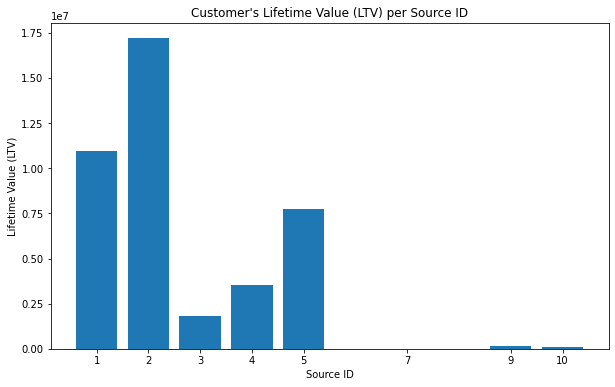

In [44]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(ltv_per_source_id['source_id'], ltv_per_source_id['LTV'])
plt.xlabel('Source ID')
plt.ylabel('Lifetime Value (LTV)')
plt.title("Customer's Lifetime Value (LTV) per Source ID")
plt.xticks(ltv_per_source_id['source_id'])
plt.show()

Based on the analysis of the customer's lifetime value (LTV) from June 2017 to June 2018, we can draw the following conclusions:

- LTV Differences: The chart and table help identify any differences in the LTV from month to month. It allows businesses to understand the revenue generated by customers over their lifetime and whether there are any noticeable changes over time. For example, if there are significant fluctuations or consistent increases/decreases in LTV, it could indicate changes in customer behavior, customer retention efforts, or changes in product offerings.

- Revenue Impact: The LTV directly impacts the overall revenue generated by the business. Monitoring the LTV trends can help businesses assess their customer retention strategies, identify high-value customers, and measure the effectiveness of marketing campaigns. Higher LTV values indicate higher customer lifetime revenue potential.

- Source_id LTV: Additionally, the analysis provides the LTV for each source_id separately. This information helps businesses understand the revenue potential associated with different marketing or acquisition channels. By comparing the LTV values for different source_ids, businesses can evaluate the effectiveness and profitability of their marketing efforts across various channels.

- Business Strategy and Customer Insights: The analysis of LTV provides valuable insights into customer revenue potential and the effectiveness of customer acquisition strategies. It helps businesses understand the long-term value of their customers, allowing them to allocate resources effectively, optimize marketing efforts, and prioritize customer retention strategies.

In conclusion, monitoring the customer's lifetime value (LTV) over time provides valuable insights into customer revenue potential, customer retention efforts, and the effectiveness of marketing campaigns. By understanding the factors influencing LTV and identifying any patterns or trends, businesses can optimize their customer acquisition and retention strategies, improve customer experiences, and drive overall profitability. Additionally, analyzing LTV by source_id helps businesses evaluate the effectiveness of their marketing channels and make data-driven decisions regarding resource allocation and investment in specific acquisition channels.

### Marketing - How much money was spent? Overall/per source/over time

To find how much money was spent overall, per source, and over time, we need to calculate the sum of the 'revenue' column in the orders_df dataframe.

In [45]:
total_revenue = orders_df['revenue'].sum()
print("Total revenue:", total_revenue)

total_costs = costs_df['costs'].sum()
print("Total costs:", total_costs)

total_profit = total_revenue - total_costs
print("Total profit:", total_profit)

Total revenue: 252057.19999999998
Total costs: 329131.62
Total profit: -77074.42000000001


Per source:

In [46]:
# Calculate cost per source
money_spent_per_source = costs_df.groupby('source_id')['costs'].sum()
print("Money spent per source:")
print(money_spent_per_source)

Money spent per source:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


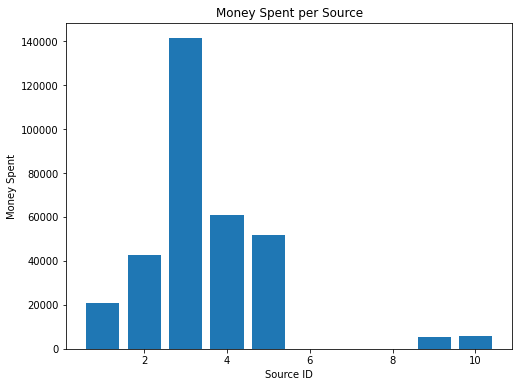

In [47]:
# Plot the bar chart for money spent per source
plt.figure(figsize=(8, 6))
plt.bar(money_spent_per_source.index, money_spent_per_source.values)
plt.xlabel('Source ID')
plt.ylabel('Money Spent')
plt.title('Money Spent per Source')
plt.show()

Over time: we segregate by month

In [48]:
# Calculate total revenue spent over time
total_revenue_over_time = orders_df.groupby(orders_df['buy_ts'].dt.to_period('M'))['revenue'].sum()

# Calculate total costs spent over time
total_costs_over_time = costs_df.groupby(pd.to_datetime(costs_df['dt']).dt.to_period('M'))['costs'].sum()

# Combine revenue and costs over time
money_spent_over_time = total_revenue_over_time.add(total_costs_over_time, fill_value=0)

print("Total money spent over time (grouped by month):")
print(money_spent_over_time)

Total money spent over time (grouped by month):
2017-06    27572.49
2017-07    30780.06
2017-08    23549.32
2017-09    42714.42
2017-10    64310.58
2017-11    64977.81
2017-12    74703.95
2018-01    52935.65
2018-02    58283.57
2018-03    59249.86
2018-04    39147.44
2018-05    42960.25
2018-06        3.42
Freq: M, dtype: float64


Then, we plot a suitable chart for the money spent over time, we can use a line plot.

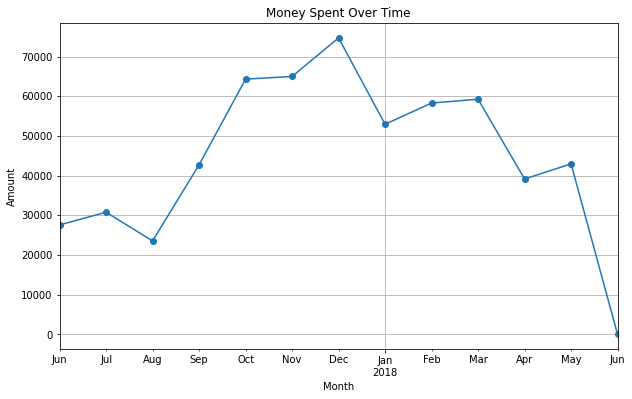

In [49]:
# Plotting the chart
plt.figure(figsize=(10, 6))
money_spent_over_time.plot(kind='line', marker='o')
plt.title('Money Spent Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

Conclusions:

- The overall trend of money spent shows fluctuations over time, with some months experiencing higher spending than others.
- There is a general upward trend in spending from the earlier months to the later months, indicating potential business growth.
- Certain months stand out with significantly higher spending, suggesting that there might have been specific marketing campaigns, promotions, or events during those periods that led to increased expenditures.
- By monitoring the patterns of money spent over time, the business can gain insights into the effectiveness of their marketing efforts, identify areas for cost optimization, and make data-driven decisions for future budget allocation.

### How much did customer acquisition from each of the sources cost

To calculate the total CAC, we need to determine the total costs spent by the company and the total number of unique customers.

In [50]:
# Calculate the total CAC
total_costs = costs_df["costs"].sum()
total_customers = orders_df["uid"].nunique()
total_cac = total_costs / total_customers

# Calculate the CAC per month
orders_df["first_order_month"] = orders_df["buy_ts"].dt.to_period("M")
nunique_users_month = orders_df.groupby("first_order_month")["uid"].nunique().reset_index()
costs_df["cost_month"] = costs_df["dt"].dt.to_period("M")
total_costs_month = costs_df.groupby("cost_month")["costs"].sum().reset_index()
cac_merged_df = pd.merge(total_costs_month, nunique_users_month, left_on="cost_month", right_on="first_order_month")
cac_merged_df["cac_per_month"] = cac_merged_df["costs"] / cac_merged_df["uid"]

# Output the total CAC and the DataFrame with CAC per month
print("Total Customer Acquisition Cost (CAC):", total_cac)
print("\nCAC per Month:")
print(cac_merged_df)

Total Customer Acquisition Cost (CAC): 9.011626098622786

CAC per Month:
   cost_month     costs first_order_month   uid  cac_per_month
0     2017-06  18015.00           2017-06  2023       8.905091
1     2017-07  18240.59           2017-07  1984       9.193846
2     2017-08  14790.54           2017-08  1472      10.047921
3     2017-09  24368.91           2017-09  2750       8.861422
4     2017-10  36322.88           2017-10  4675       7.769600
5     2017-11  37907.88           2017-11  4547       8.336899
6     2017-12  38315.35           2017-12  4942       7.753005
7     2018-01  33518.52           2018-01  3898       8.598902
8     2018-02  32723.03           2018-02  4258       7.685070
9     2018-03  30415.27           2018-03  4181       7.274640
10    2018-04  22289.38           2018-04  2744       8.122952
11    2018-05  22224.27           2018-05  3544       6.270957


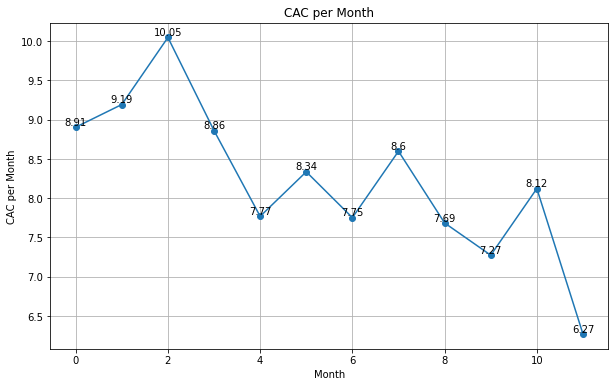

In [51]:
# Plotting the CAC per month
plt.figure(figsize=(10, 6))
plt.plot(cac_merged_df["cac_per_month"], marker='o')
plt.xlabel("Month")
plt.ylabel("CAC per Month")
plt.title("CAC per Month")
plt.xticks(rotation=0)
plt.grid(True)

# Adding value annotations
for i, value in enumerate(cac_merged_df["cac_per_month"]):
    plt.text(i, value, str(round(value, 2)), ha="center", va="bottom")

plt.show()

Based on the provided CAC per Month graph, we can draw the following conclusions:

- The CAC per month varies over the analyzed period. The values range from a low of 6.27 in May 2018 to a high of 10.05 in August 2017.

- There is no consistent upward or downward trend in the CAC per month. However, there is a notable increase in CAC during the months of August, September, and October 2017. This may suggest higher marketing and customer acquisition costs during that period.

- The months of May 2018 and April 2018 had relatively lower CAC values, indicating potentially more efficient customer acquisition efforts during those periods.

- From November 2017 to March 2018, the CAC values remained relatively stable, fluctuating between 7.27 and 8.60. This suggests consistent customer acquisition costs during that period.


In [52]:
# Group the costs by both the cost month and the source ID
grouped_costs = costs_df.groupby(["cost_month", "source_id"]).agg({"costs": "sum"}).reset_index()

# Merge the grouped costs with the nunique users per month on the left "cost_month" and the right "first_order_month"
merged_dff = pd.merge(grouped_costs, nunique_users_month, left_on="cost_month", right_on="first_order_month")

# Calculate the CAC per month by dividing the total costs by the number of unique users
merged_dff["cac_per_month"] = merged_dff["costs"] / merged_dff["uid"]

# Output the merged DataFrame with CAC per month
print("CAC per Month:")
print(merged_dff)

CAC per Month:
   cost_month  source_id    costs first_order_month   uid  cac_per_month
0     2017-06          1  1125.61           2017-06  2023       0.556406
1     2017-06          2  2427.38           2017-06  2023       1.199891
2     2017-06          3  7731.65           2017-06  2023       3.821873
3     2017-06          4  3514.80           2017-06  2023       1.737420
4     2017-06          5  2616.12           2017-06  2023       1.293188
..        ...        ...      ...               ...   ...            ...
79    2018-05          3  9411.42           2018-05  3544       2.655593
80    2018-05          4  4214.21           2018-05  3544       1.189111
81    2018-05          5  3669.56           2018-05  3544       1.035429
82    2018-05          9   362.17           2018-05  3544       0.102192
83    2018-05         10   409.86           2018-05  3544       0.115649

[84 rows x 6 columns]


Make the plot for CAC by Source

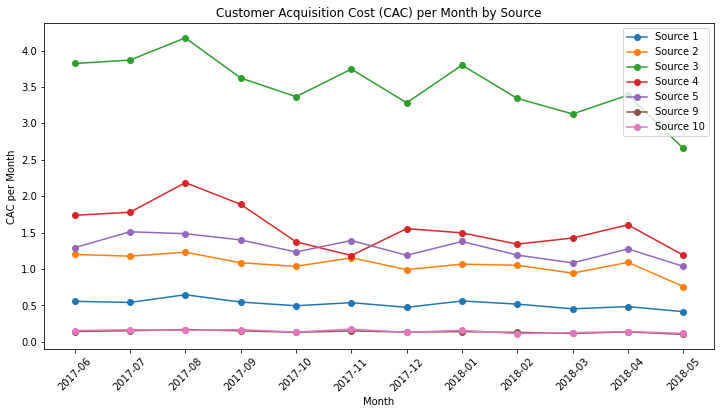

In [53]:
# Convert cost_month to string for proper plotting
merged_dff["cost_month_str"] = merged_dff["cost_month"].astype(str)

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot the graph
for source_id in merged_dff["source_id"].unique():
    source_data = merged_dff.loc[merged_dff["source_id"] == source_id]
    plt.plot(source_data["cost_month_str"], source_data["cac_per_month"], marker='o', label=f"Source {source_id}")

plt.xlabel("Month")
plt.ylabel("CAC per Month")
plt.title("Customer Acquisition Cost (CAC) per Month by Source")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Based on the CAC per Month data for each source, we can draw the following conclusions for the graph "Customer Acquisition Cost (CAC) per Month by Source":

- Source 1 has a relatively low CAC per month, with an average cost of 0.56. This indicates that acquiring customers through this source is cost-effective.

- Source 2 has a higher CAC per month compared to Source 1, with an average cost of 1.20. Acquiring customers through this source is relatively more expensive compared to Source 1.

- Source 3 has the highest CAC per month among all sources, with an average cost of 3.82. Acquiring customers through this source is significantly more expensive compared to the other sources.

- Sources 4 and 5 have intermediate CAC per month values, with average costs of 1.74 and 1.29, respectively. Acquiring customers through these sources falls between the cost-effectiveness of Source 1 and the higher costs of Source 2 and Source 3.

- Sources 9 and 10 have the lowest CAC per month values among all sources, with average costs of 0.10 and 0.12, respectively. Acquiring customers through these sources is the most cost-effective among all the sources.

### How worthwhile where the investments? (ROI)

In [63]:
# Renaming columns to lowercase with underscores:
orders.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

#Converting "buy_ts" column to datetime format:
orders["buy_ts"] = pd.to_datetime(orders["buy_ts"])
# Converting "dt" column in "costs" dataframe to datetime format:
costs["dt"] = pd.to_datetime(costs["dt"])

#Creating "cost_month" column with monthly periods:
costs["cost_month"] = pd.to_datetime(costs["dt"].dt.strftime("%Y-%m-01"))
#Grouping and aggregating costs by source_id and cost_month:
costs_t = costs.groupby(["source_id", "cost_month"]).agg({"costs": "sum"}).reset_index()

#Creating "order_month" column with monthly periods:
orders["order_month"] = pd.to_datetime(orders["buy_ts"].dt.strftime("%Y-%m-01"))
#Grouping and aggregating revenue by order_month:
order_t = orders.groupby("order_month").agg({"revenue": "sum"}).reset_index()

Based on the provided profit_df DataFrame, it appears that only source_id 1 has generated a positive profit. For all other source_ids, the profit is either negative or zero.

,source_id,cost_month,costs,order_month,revenue,roi_m
0,1,2017-06-01,1125.61,2017-06-01,9557.49,7.490943
1,2,2017-06-01,2427.38,2017-06-01,9557.49,2.937369
2,3,2017-06-01,7731.65,2017-06-01,9557.49,0.236151
3,4,2017-06-01,3514.80,2017-06-01,9557.49,1.719213
4,5,2017-06-01,2616.12,2017-06-01,9557.49,2.653307
...,...,...,...,...,...,...
79,3,2018-05-01,9411.42,2018-05-01,20735.98,1.203279
80,4,2018-05-01,4214.21,2018-05-01,20735.98,3.920490
81,5,2018-05-01,3669.56,2018-05-01,20735.98,4.650808
82,9,2018-05-01,362.17,2018-05-01,20735.98,56.254825


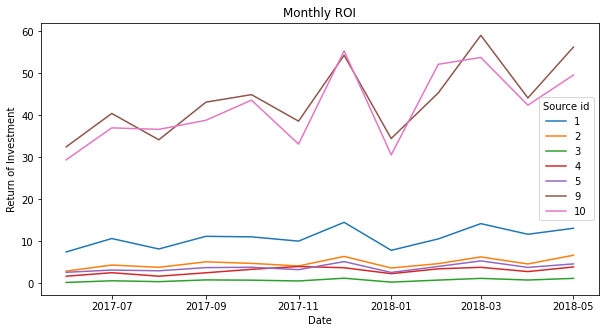

In [64]:
#Merging the "costs_t" and "order_t" dataframes:
final = pd.merge(costs_t, order_t, left_on="cost_month", right_on="order_month")

#Calculating the monthly return on investment (ROI):
final["roi_m"] = (final["revenue"] - final["costs"]) / final["costs"]   
display(final)

#Creating a line plot to visualize monthly ROI by source_id:
plt.figure(figsize=[10, 5])
for s_id in final["source_id"].unique():
    df = final.query("source_id == @s_id")
    plt.plot("cost_month", "roi_m", data=df, label=s_id)
plt.legend(title="Source id")
plt.xlabel("Date")
plt.ylabel("Return of Investment")
plt.title("Monthly ROI")
plt.show()

Based on the provided data, we have the ROI (Return on Investment) values for different source IDs and months. Here are some conclusions we can draw from the data:

- Source ID 10 has the highest ROI of 56.25 for the month of May 2018. This suggests that investments made through Source ID 10 yielded substantial returns during that month.

- Source ID 3 consistently shows relatively lower ROI values across multiple months. This indicates that the investments made through Source ID 3 did not generate high returns compared to other sources.

- ROI values can vary significantly from one month to another for the same source ID. For example, Source ID 9 had an ROI of 56.25 in May 2018, while in other months, its ROI may be much lower or even negative. This suggests that the performance of different sources can vary over time.

- In general, the ROI values for all source IDs and months are positive. This indicates that, on average, the investments made resulted in a positive return.

## Advise marketing experts how much money to invest and where.

Based on the information we gained, the marketing experts can make data-driven decisions regarding their budget allocation. Here are some recommendations based on the analysis:

- Overall marketing budget: The company has experienced a negative profit, indicating that the total costs spent on marketing and customer acquisition have exceeded the revenue generated. Therefore, it is advisable for the marketing experts to evaluate their marketing strategies and consider optimizing costs without compromising the effectiveness of their campaigns.

- Customer Acquisition Cost (CAC) per source: Evaluate the CAC per source_id to determine which marketing sources are more cost-effective in acquiring customers. Allocate a higher proportion of the marketing budget to the sources that have a lower CAC. In this case, source_id 10 seems to have the lowest CAC, indicating potential cost-effectiveness.

- CAC per month: Analyze the CAC per month to identify trends and patterns. Allocate the marketing budget strategically by considering the variations in CAC over time. For example, during months with lower CAC values, it might be advantageous to invest more in marketing efforts to capitalize on the efficiency of customer acquisition.

- High-cost months: Identify the months with higher CAC values, such as August, September, and October 2017, and evaluate the effectiveness of marketing campaigns during those periods. Consider optimizing marketing strategies and reallocating resources to ensure better cost-effectiveness in customer acquisition.

- Stable CAC months: The months from November 2017 to March 2018 exhibited relatively stable CAC values. Utilize the insights from those months to establish baseline cost-effective marketing strategies and maintain consistency in customer acquisition efforts.

- Monitor ROI:  Consider the ROI (return on investment) for each source and month. ROI measures the profitability of each marketing investment. Focus on sources and months with higher ROI values, as they indicate a better return relative to the costs incurred. Allocate a larger portion of the marketing budget to these high-performing sources.

    - Source_id 9 and 10 exhibit significantly higher ROI values compared to other sources, particularly in the last month of the data (May 2018). Consider allocating more resources to these sources as they have demonstrated a strong potential for generating revenue.
    - Source_id 3 and 4 have consistently lower ROI values throughout the analyzed period. Evaluate the effectiveness of marketing strategies associated with these sources and consider optimizing or reducing the budget allocation for them. This reallocation can be directed towards more cost-effective sources with higher ROI.
    - Source_id 1 and 2 also show relatively lower ROI values compared to some other sources. Although they are not as low as source_id 3 and 4, evaluate their performance and consider optimizing the marketing efforts associated with these sources.
